# Analyse BlueSeis BSPF Event Analysis

With pressure sensor parascientific and new sensor 

In [1]:
import os 
import obspy as obs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from andbro__savefig import __savefig

In [2]:
from functions.get_theoretical_backazimuth import __get_theoretical_backazimuth
from functions.request_data import __request_data
from functions.compute_adr_pfo import __compute_adr_pfo

In [3]:
# def __request_data(seed, tbeg, tend):

#     from obspy.clients.fdsn import Client

#     client = Client("IRIS")

#     net, sta, loc, cha = seed.split(".")

#     try:
#         inventory = client.get_stations(network=net, 
#                                          station=sta,
#                                          starttime=tbeg-60,
#                                          endtime=tend+60,
#                                          level="response",
#                                          )
#     except:
#         print("Failed to load inventory!")
#         inventory = None
        
#     try:
#         waveform = client.get_waveforms(network=net,
#                                        station=sta,
#                                        location=loc,
#                                        channel=cha, 
#                                        starttime=tbeg-60,
#                                        endtime=tend+60,
#                                        )

#     except:
#         print("Failed to load waveforms!")
#         waveform = None
    
#     return waveform, inventory

In [4]:
# def __get_theo_baz(config, fdsn_client="USGS"):
    
#     from obspy.clients.fdsn import Client
#     from obspy.geodetics.base import gps2dist_azimuth

#     ## get event if not provided
#     if 'event' not in config.keys():
#         events = Client(fdsn_client).get_events(starttime=config['eventtime']-20, endtime=config['eventtime']+20)
#         if len(events) > 1:
#             print(f" -> {len(events)} events found!!!")
#             print(events)
            
#     event = events[0]
        
#     ## event location from event info
#     config['source_latitude'] = event.origins[0].latitude
#     config['source_longitude'] = event.origins[0].longitude
    
    
#     dist, az, baz = gps2dist_azimuth(
#                                     config['source_latitude'], config['source_longitude'], 
#                                     config['BSPF_lat'], config['BSPF_lon'],
#                                     )
    

#     return baz

## Configurations

In [5]:
workdir = "/home/andbro/Documents/ROMY/BSPF"

In [6]:
config = {}

## blueSeis sensor BSPF
config['seed_blueseis'] = "PY.BSPF..HJ*"

## Trillium 240 next to BlueSeis on Pier
config['seed_seismometer'] = "II.PFO.10.BH*"

## from April 2023 onwards STS-2
config['seed_seismometer'] = "PY.PFOIX..HH*" 

## BSPF coordinates
config['BSPF_lon'] = -116.455439
config['BSPF_lat'] = 33.610643

## Event Info

In [50]:
## Peru / Ecuador 
# config['tbeg'] = obs.UTCDateTime("2022-10-05 10:26")
# config['tend'] = obs.UTCDateTime("2022-10-05 10:40")

## Near PFO  - !! with XX location code
# config['tbeg'] = obs.UTCDateTime("2022-10-05 15:39:32")
# config['tend'] = obs.UTCDateTime("2022-10-05 15:39:45")


## Gulf of California M6.2 -> somewhat
# config['title'] = "Gullf of California | 2022-11-04 10:02 UTC | M6.2"
# config['tbeg'] = obs.UTCDateTime("2022-11-04 10:02")
# config['tend'] = obs.UTCDateTime("2022-11-04 10:15")
# config['fmin'], config['fmax'] = 0.025, 0.2

## ..., California M3.2 -> good
# config['tbeg'] = obs.UTCDateTime("2023-01-09 19:42:56")
# config['tend'] = config['tbeg']+20
# config['fmin'], config['fmax'] = 0.5, 10.0
# config['title'] = f"Borrego Springs, Ca | {config['tbeg'].date} {str(config['tbeg'].time)[:5]} UTC | M3.2"

## Las Brisas, Mexico M6.2 -> alright
# config['title'] = "Las Brisas, Mexico | 2022-11-22 16:39 UTC | M6.2"
# config['eventtime'] = obs.UTCDateTime("2022-11-22 16:39")
# config['tbeg'] = obs.UTCDateTime("2022-11-22 16:32")
# config['tend'] = obs.UTCDateTime("2022-11-22 17:00")
# config['fmin'], config['fmax'] = 0.01, 0.5

## Borrego Springs, California M4.2 -> good
# config['eventtime'] = obs.UTCDateTime("2022-12-31 12:12:26")
# config['tbeg'] = obs.UTCDateTime("2022-12-31 12:12:27")
# config['tend'] = obs.UTCDateTime("2022-12-31 12:13")
# config['fmin'], config['fmax'] = 0.1, 15.0
# config['title'] = f"Borrego Springs, Ca | {config['tbeg'].date} {str(config['tbeg'].time)[:5]} UTC | M4.2"




## _________________with_STS-2________________________________

## ..., California M2.7
# config['tbeg'] = obs.UTCDateTime("2023-04-10 14:50:56")
# config['tend'] = config['tbeg']+25
# config['fmin'], config['fmax'] = 0.5, 80.0
# config['title'] = f"Borrego Springs, Ca | {config['tbeg'].date} {str(config['tbeg'].time)[:5]} UTC | M2.7"


        
## ... 
config['eventtime'] = obs.UTCDateTime("2023-04-30 07:09:35")
config['tbeg'] = obs.UTCDateTime("2023-04-30 07:09:00")
config['tend'] = config['tbeg']+300
config['fmin'], config['fmax'] = 3, 12
config['title'] = f"... | {config['tbeg'].date} {str(config['tbeg'].time)[:5]} UTC | M4.5"


## Load Data

### Load blueSeis Data

 -> sensitivity removed!
3 Trace(s) in Stream:
PY.BSPF..HJE | 2023-04-30T07:08:59.998300Z - 2023-04-30T07:13:59.998300Z | 200.0 Hz, 60001 samples
PY.BSPF..HJN | 2023-04-30T07:08:59.998300Z - 2023-04-30T07:13:59.998300Z | 200.0 Hz, 60001 samples
PY.BSPF..HJZ | 2023-04-30T07:08:59.998300Z - 2023-04-30T07:13:59.998300Z | 200.0 Hz, 60001 samples


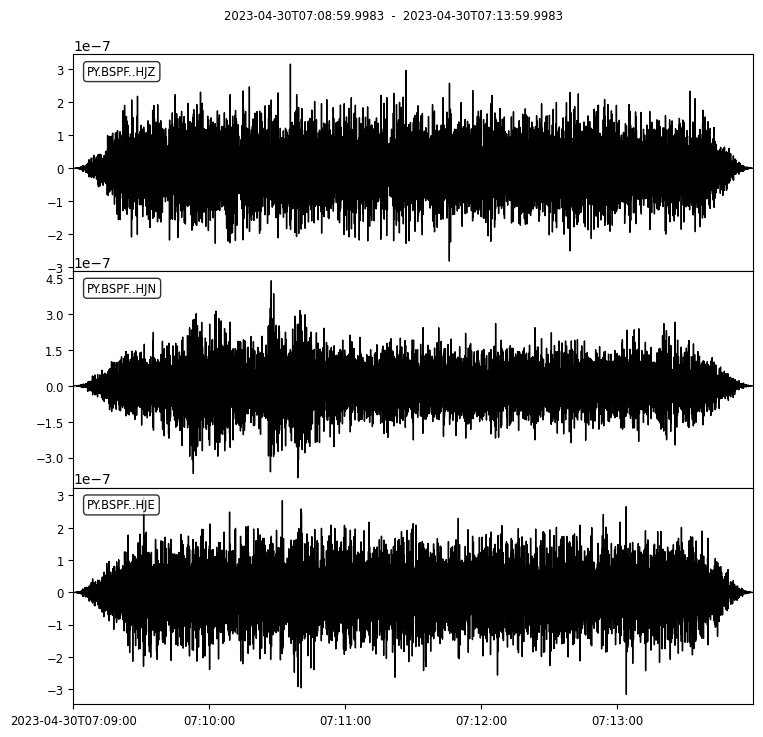

In [51]:
py_bspf0, py_bspf_inv = __request_data(config['seed_blueseis'], config['tbeg'], config['tend'])


py_bspf = py_bspf0.copy()

## merge traces that might be split due to data gaps or overlaps
if len(py_bspf) > 3:
    py_bspf.merge(fill_value="interpolate")

## resample to 40 Hz
if config['seed_seismometer'].split(".")[3][0] == "B":
    py_bspf.resample(40)

## cut to event
py_bspf.trim(config['tbeg'], config['tend'])

## remove mean
py_bspf.detrend("demean")

## apply taper
py_bspf.taper(0.1)

## bandpass filter
py_bspf.filter("bandpass", freqmin=config['fmin'], freqmax=config['fmax'], corners=4, zerophase=True)

## show all traces in data stream
print(py_bspf)

py_bspf.plot(equal_scale=False);

### Load Seismometer Data

 -> response removed!
3 Trace(s) in Stream:
PY.PFOIX..HHE | 2023-04-30T07:09:00.000000Z - 2023-04-30T07:14:00.000000Z | 200.0 Hz, 60001 samples
PY.PFOIX..HHN | 2023-04-30T07:09:00.000000Z - 2023-04-30T07:14:00.000000Z | 200.0 Hz, 60001 samples
PY.PFOIX..HHZ | 2023-04-30T07:09:00.000000Z - 2023-04-30T07:14:00.000000Z | 200.0 Hz, 60001 samples


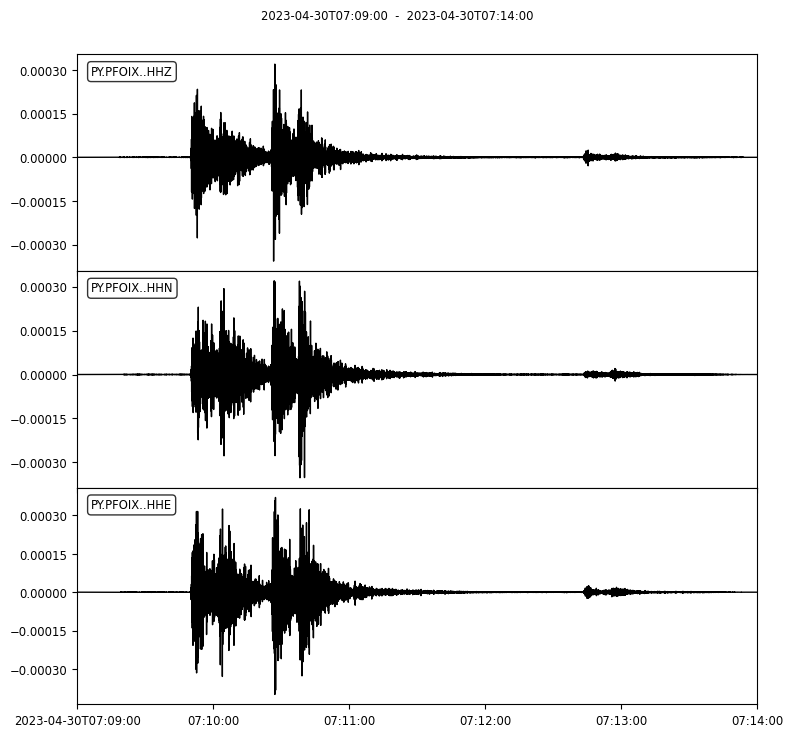

In [30]:
ii_pfo0, ii_pfo_inv = __request_data(config['seed_seismometer'], config['tbeg'], config['tend'])


ii_pfo = ii_pfo0.copy()

## cut properly
ii_pfo.trim(config['tbeg'], config['tend'])

## demean
ii_pfo.detrend("demean")

## taper 
ii_pfo.taper(0.1)

## bandpass
ii_pfo.filter("bandpass", freqmin=config['fmin'], freqmax=config['fmax'], corners=4, zerophase=True)

print(ii_pfo)
ii_pfo.plot(equal_scale=False);

## Load ADR 

In [31]:
adr_inner = __compute_adr_pfo(config['tbeg'], config['tend'], submask="inner")

adr_inner = adr_inner.taper(0.1)
adr_inner = adr_inner.filter("bandpass", freqmin=config['fmin'], freqmax=config['fmax'], corners=4, zerophase=True)
adr_inner

 -> continue computing ADR for 4 stations ...
3 Trace(s) in Stream:
PY.BPH01..BHZ | 2023-04-30T07:08:50.021900Z - 2023-04-30T07:14:09.996900Z | 40.0 Hz, 12800 samples
PY.BPH01..BHN | 2023-04-30T07:08:50.021900Z - 2023-04-30T07:14:09.996900Z | 40.0 Hz, 12800 samples
PY.BPH01..BHE | 2023-04-30T07:08:50.021900Z - 2023-04-30T07:14:09.996900Z | 40.0 Hz, 12800 samples

 Runtime: 0.33 minutes


3 Trace(s) in Stream:
PY.RPFO..BJZ | 2023-04-30T07:09:00.021900Z - 2023-04-30T07:13:59.996900Z | 40.0 Hz, 12000 samples
PY.RPFO..BJN | 2023-04-30T07:09:00.021900Z - 2023-04-30T07:13:59.996900Z | 40.0 Hz, 12000 samples
PY.RPFO..BJE | 2023-04-30T07:09:00.021900Z - 2023-04-30T07:13:59.996900Z | 40.0 Hz, 12000 samples

In [32]:
adr_outer = __compute_adr_pfo(config['tbeg'], config['tend'], submask="optimal")

adr_outer = adr_outer.taper(0.1)
adr_outer = adr_outer.filter("bandpass", freqmin=config['fmin'], freqmax=config['fmax'], corners=4, zerophase=True)
adr_outer

No data available for request.
Detailed response of server:


 -> geting waveforms failed ofr BPH10...
No data available for request.
Detailed response of server:


 -> geting waveforms failed ofr BPH12...
 -> continue computing ADR for 5 stations ...
3 Trace(s) in Stream:
PY.BPH01..BHZ | 2023-04-30T07:08:50.021900Z - 2023-04-30T07:14:09.996900Z | 40.0 Hz, 12800 samples
PY.BPH01..BHN | 2023-04-30T07:08:50.021900Z - 2023-04-30T07:14:09.996900Z | 40.0 Hz, 12800 samples
PY.BPH01..BHE | 2023-04-30T07:08:50.021900Z - 2023-04-30T07:14:09.996900Z | 40.0 Hz, 12800 samples

 Runtime: 0.4 minutes


3 Trace(s) in Stream:
PY.RPFO..BJZ | 2023-04-30T07:09:00.021900Z - 2023-04-30T07:13:59.996900Z | 40.0 Hz, 12000 samples
PY.RPFO..BJN | 2023-04-30T07:09:00.021900Z - 2023-04-30T07:13:59.996900Z | 40.0 Hz, 12000 samples
PY.RPFO..BJE | 2023-04-30T07:09:00.021900Z - 2023-04-30T07:13:59.996900Z | 40.0 Hz, 12000 samples

In [33]:
st_adr = obs.Stream()

st_adr += py_bspf.copy()
st_adr += adr_inner.copy()
st_adr += adr_outer.copy()

st_adr = st_adr.trim(adr_inner[0].stats.starttime, adr_inner[0].stats.endtime)

### Join Data

In [34]:
st_all = obs.Stream()

st_all += py_bspf.copy()
st_all += ii_pfo.copy()
st_all += adr_inner.copy()


st_all = st_all.trim(adr_inner[0].stats.starttime, adr_inner[0].stats.endtime)

# st_all = st_all.normalize()

## Plotting

In [35]:
def __makeplot_traces(config, st0):

    st = st0.copy()
    
    fig, ax = plt.subplots(len(st),1, figsize=(15,10), sharex=True)

    font = 14

    time_scaling, time_unit = 1, "sec"
    rot_scaling = 1e9
    trans_scaling = 1e6
    
    for i, tr in enumerate(st):

        if i in [0,1,2]:
            ax[i].set_ylabel(r"$\omega$ (nrad/s)", fontsize=font)
            ax[i].plot(tr.times()/time_scaling, tr.data*rot_scaling, 'k', label=tr.stats.station+"."+tr.stats.channel)

        elif i in [3,4,5]:
            ax[i].set_ylabel(r"u ($\mu$m/s)", fontsize=font)
            ax[i].plot(tr.times()/time_scaling, tr.data*trans_scaling, 'k', label=tr.stats.station+"."+tr.stats.channel)
        
        elif i in [6,7,8]:
            ax[i].set_ylabel(r"$\omega$ (nrad/s)", fontsize=font)
            ax[i].plot(tr.times()/time_scaling, tr.data*rot_scaling, 'k', label=tr.stats.station+"."+tr.stats.channel)
            
        ax[i].legend(loc=1)
        
    ax[len(st)-1].set_xlabel(f"Time ({time_unit}) from {st[0].stats.starttime.date} {str(st[0].stats.starttime.time).split('.')[0]} UTC", fontsize=font)
    ax[0].set_title(config['title']+f" | {config['fmin']} - {config['fmax']} Hz", fontsize=font, pad=10)
    
    plt.show();
    return fig

In [36]:
# fig = __makeplot_traces(config, st_all)

In [46]:
def __makeplot_traces2(config, st0):

    st = st0.copy()
    
    fig, ax = plt.subplots(len(st),1, figsize=(15,10), sharex=True)

    font = 14

    time_scaling, time_unit = 1, "sec"
    rot_scaling = 1e6
    trans_scaling = 1e3
    
    for i, tr in enumerate(st):

        if i in [0,1,2]:
#             ax[i].set_ylabel(r"$\omega$ (nrad/s)", fontsize=font)
            ax[i].plot(tr.times()*time_scaling, tr.data*rot_scaling, 'black', label=tr.stats.station+"."+tr.stats.channel)
            ax[i].set_ylabel(r"$\omega$ ($\mu$rad/s)")
        elif i in [3,4,5]:
#             ax[i].set_ylabel(r"u ($\mu$m/s)", fontsize=font)
            ax[i].plot(tr.times()*time_scaling, tr.data*trans_scaling, 'darkred', label=tr.stats.station+"."+tr.stats.channel)
            ax[i].set_ylabel(r"a (mm/s)")
        
        elif i in [6,7,8]:
#             ax[i].set_ylabel(r"$\omega$ (nrad/s)", fontsize=font)
            ax[i].plot(tr.times()*time_scaling, tr.data*rot_scaling, 'darkgreen', label=tr.stats.station+"."+tr.stats.channel)
            ax[i].set_ylabel(r"adr ($\mu$rad/s)")
         
#         ax[i].set_ylim(-1,1)
        ax[i].spines['right'].set_visible(False)
        ax[i].spines['top'].set_visible(False)
        if i != int(len(st)-1):
            ax[i].spines['bottom'].set_visible(False)
#             ax[i].set(xticklabels=[]) 
            ax[i].tick_params(bottom=False)
        
        ax[i].legend(loc=1)
        
    ax[len(st)-1].set_xlabel(f"Time ({time_unit}) from {st[0].stats.starttime.date} {str(st[0].stats.starttime.time).split('.')[0]} UTC", fontsize=font)
    ax[0].set_title(config['title']+f" | {config['fmin']} - {config['fmax']} Hz", fontsize=font, pad=10)
    
    plt.show();
    return fig

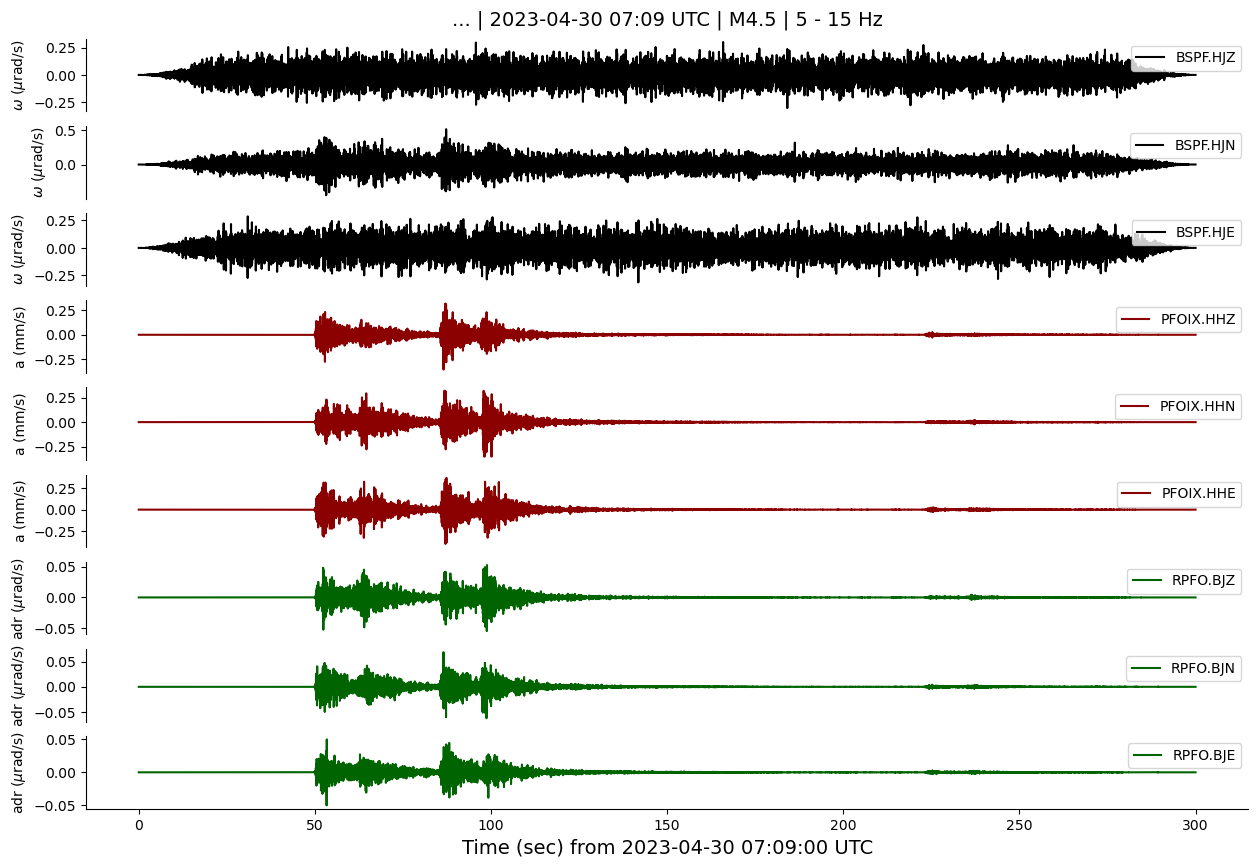

In [47]:
fig = __makeplot_traces2(config, st_all)

In [ ]:
# __savefig(fig, outpath="/home/andbro/Downloads/tmp/BSPF/", outname="BSPF_event_1", mode="png", dpi=300)

In [39]:
def __makeplotStreamSpectra2(st, config, fscale=None):

    from scipy import fftpack
    from andbro__fft import __fft
    import matplotlib.pyplot as plt

    NN = len(st)
    rot_scaling, rot_unit = 1e6, r"$\mu$rad/s"
    trans_scaling, trans_unit = 1e3, r"mm/s"
        
    fig, axes = plt.subplots(NN,2,figsize=(15,int(NN*2)), sharex='col')

    font = 14
    
    plt.subplots_adjust(hspace=0.3)

    ## _______________________________________________

    st.sort(keys=['channel'], reverse=True)
    
    for i, tr in enumerate(st):

#         comp_fft = abs(fftpack.fft(tr.data))
#         ff       = fftpack.fftfreq(comp_fft.size, d=1/tr.stats.sampling_rate)
#         comp_fft = fftpack.fftshift(comp_fft)
#         ff, spec = ff[1:len(ff)//2], abs(fftpack.fft(tr.data)[1:len(ff)//2])

        if tr.stats.channel[-2] == "J":
            scaling = rot_scaling
        elif tr.stats.channel[-2] == "H":
            scaling = trans_scaling

        spec, ff, ph = __fft(tr.data*scaling, tr.stats.delta, window=None, normalize=None)
    
    
        ## _________________________________________________________________
        if tr.stats.channel[-2] == "J":
            axes[i,0].plot(
                        tr.times(),
                        tr.data*rot_scaling,
                        color='black',
                        label='{} {}'.format(tr.stats.station, tr.stats.channel),
                        lw=1.0,
                        )
            axes[i,1].fill_between(ff, 0, spec, alpha=0.9, color='black', lw=0)


        elif tr.stats.channel[-2] == "H":
            axes[i,0].plot(
                        tr.times(),
                        tr.data*trans_scaling,
                        color='darkblue',
                        label='{} {}'.format(tr.stats.station, tr.stats.channel),
                        lw=1.0,
                        )
            axes[i,1].fill_between(ff, 0, spec, alpha=0.9, color='darkblue', lw=0)


        ## _________________________________________________________________
#         if fscale == "loglog":
# #             axes[i,1].loglog(ff, spec, color='black', lw=1.0)
#             axes[i,1].fill_between(ff, 0, spec, alpha=0.7, color='black', lw=1.)
            
#         elif fscale == "loglin":
# #             axes[i,1].semilogx(ff, spec, color='black', lw=1.0)
#             axes[i,1].fill_between(ff, 0, spec, alpha=0.7, color='black', lw=1.)

#         elif fscale == "linlog":
# #             axes[i,1].semilogy(ff, spec, color='black', lw=1.0)
#             axes[i,1].fill_between(ff, 0, spec, alpha=0.7, color='black', lw=1.)

#         else:
# #             axes[i,1].plot(ff, spec, color='black', lw=1.0)
#             axes[i,1].fill_between(ff, 0, spec, alpha=0.7, color='black')

        
        if tr.stats.channel[1] == "J":
            sym, unit = r"$\Omega$", rot_unit
        elif tr.stats.channel[1] == "H":
            sym, unit = "v", trans_unit
        else:
            unit = "Amplitude", "a.u."
            
        axes[i,0].set_ylabel(f'{sym} ({unit})',fontsize=font)    
        axes[i,1].set_ylabel(f'ASD \n({unit}/Hz)',fontsize=font)        
        axes[i,0].legend(loc='upper left',bbox_to_anchor=(0.8, 1.10), framealpha=1.0)
        
#         axes[i,0].ticklabel_format(axis='y', style='sci', scilimits=(0,0))
#         axes[i,1].ticklabel_format(axis='y', style='sci', scilimits=(0,0))

    if "fmin" in config.keys() and "fmax" in config.keys():
        axes[i,1].set_xlim(config['fmin'],config['fmax'])

    axes[NN-1,0].set_xlabel(f"Time from {tr.stats.starttime.date} {str(tr.stats.starttime.time)[:8]} (s)",fontsize=font)     
    axes[NN-1,1].set_xlabel(f"Frequency (Hz)",fontsize=font)     

    return fig

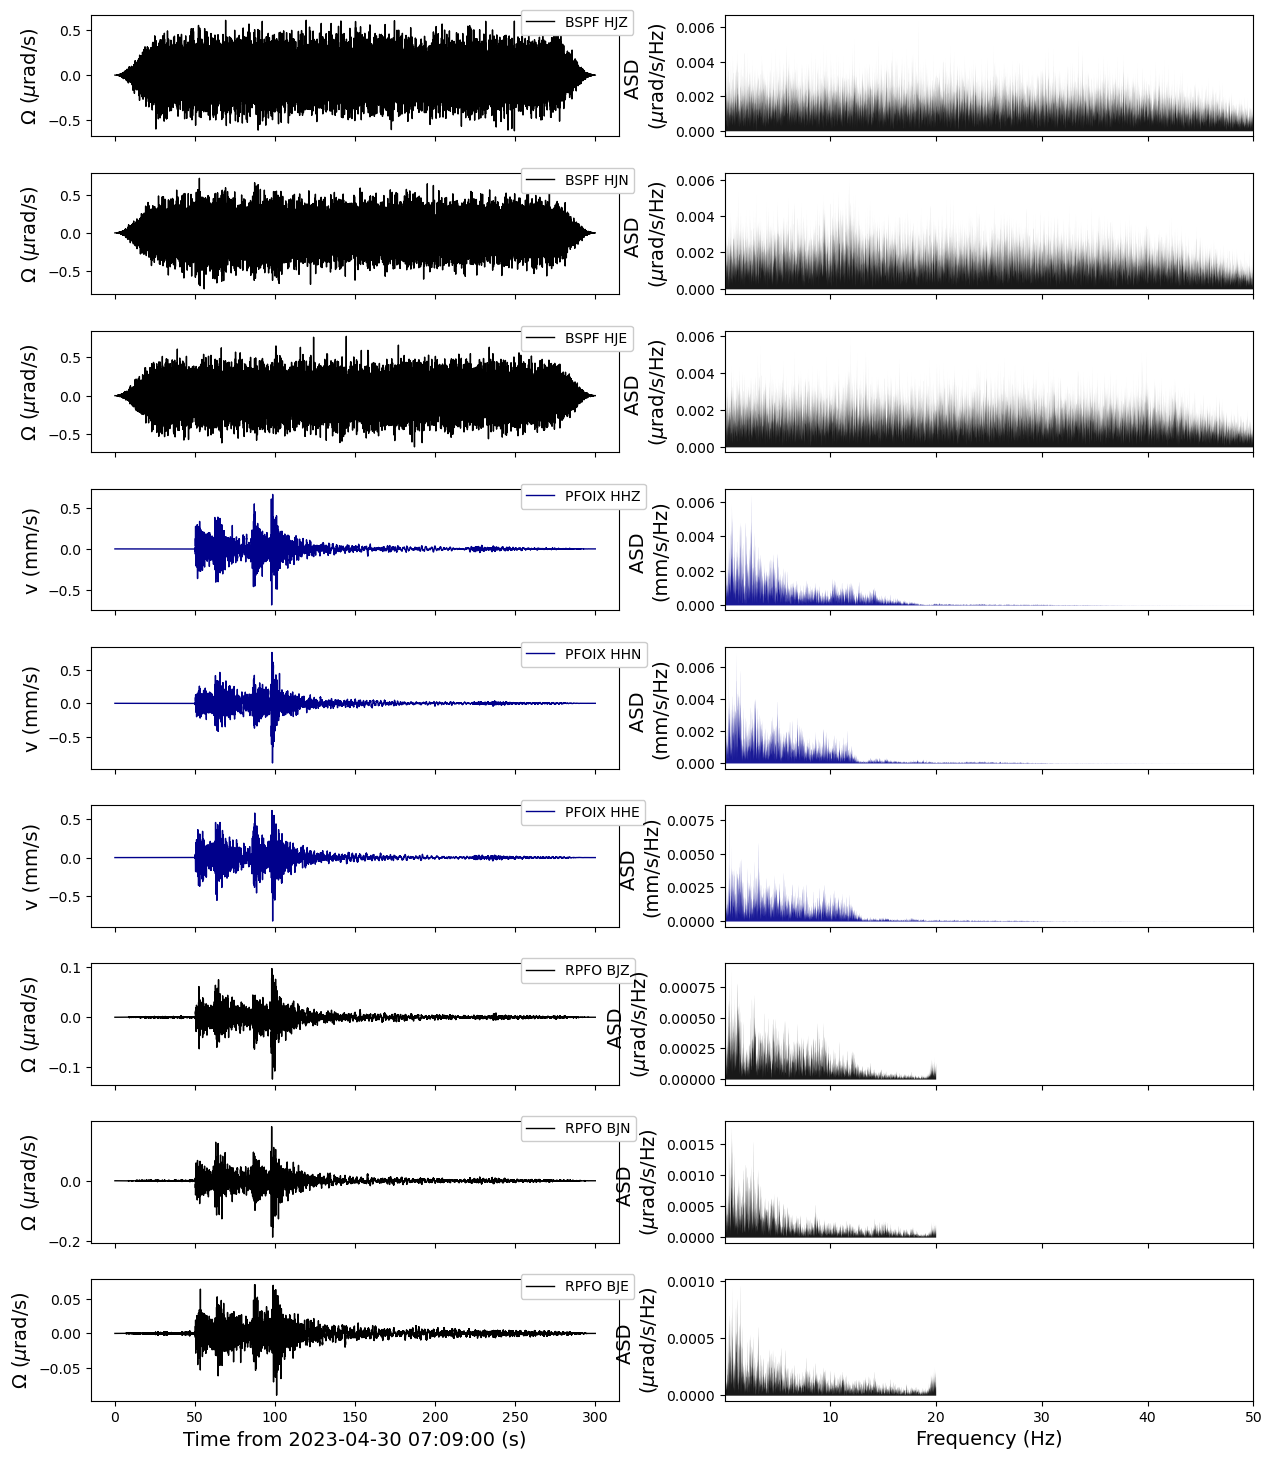

In [20]:
fig = __makeplotStreamSpectra2(st_all, config, fscale="linlin");

In [21]:
# __savefig(fig, outpath="/home/andbro/Downloads/tmp/BSPF/", outname="BSPF_ASD_event_1", mode="png", dpi=300)

In [24]:
def __makeplotStreamSpectra3(st0, config):

    from scipy import fftpack
    from andbro__fft import __fft
    from matplotlib.gridspec import GridSpec
    import matplotlib.pyplot as plt

    st = st0.copy()
    
    NN = 5
    rot_scaling, rot_unit = 1e9, r"nrad/s"
    trans_scaling, trans_unit = 1e6, r"$\mu$m/s"
    
#     rot_scaling, rot_unit = 1, r"nrad/s"
#     trans_scaling, trans_unit = 1, r"$\mu$m/s"

    colors = ['crimson', 'red', 'magenta', 'green', 'yellowgreen', 'lime']

#     fig, axes = plt.subplots(NN, 2 ,figsize=(15, int(NN*2)), sharex='col', layout="constrained")
    fig = plt.figure(figsize=(15,12))
    
    gs = GridSpec(NN, 2, figure=fig)
    
    ax1 = fig.add_subplot(gs[0, :-1])
    ax2 = fig.add_subplot(gs[1, :-1])
    ax3 = fig.add_subplot(gs[2, :-1])

    ax4 = fig.add_subplot(gs[0, 1:])
    ax5 = fig.add_subplot(gs[1, 1:])
    ax6 = fig.add_subplot(gs[2, 1:])

    ax7 = fig.add_subplot(gs[3:, :])
    
    
    font = 14
    
    plt.subplots_adjust(hspace=0.1)

    ## _______________________________________________

    st.sort(keys=['channel'], reverse=True)
    
    ffs, specs, names = [], [], []
    for i, tr in enumerate(st):

#         tr = tr.normalize()
        
        if tr.stats.channel[-2] == "J":
            scaling = rot_scaling
        elif tr.stats.channel[-2] == "H":
            scaling = trans_scaling

        spec, ff, ph = __fft(tr.data*scaling, tr.stats.delta, window=None, normalize=True)
        
        ffs.append(ff)
        specs.append(spec)
        names.append(f"{tr.stats.station}.{tr.stats.channel}")
    
    hz = st.select(channel="*HZ")[0]
    hn = st.select(channel="*HN")[0]
    he = st.select(channel="*HE")[0]

    jz = st.select(channel="*JZ")[0]
    jn = st.select(channel="*JN")[0]
    je = st.select(channel="*JE")[0]

    ax1.plot(hz.times(), hz.data*trans_scaling, 'k', label=f"{hz.stats.station}.{hz.stats.channel}")
    ax2.plot(hn.times(), hn.data*trans_scaling, 'k', label=f"{hn.stats.station}.{hn.stats.channel}")
    ax3.plot(he.times(), he.data*trans_scaling, 'k', label=f"{he.stats.station}.{he.stats.channel}")

    ax4.plot(jz.times(), jz.data*rot_scaling, 'k', label=f"{jz.stats.station}.{jz.stats.channel}")
    ax5.plot(jn.times(), jn.data*rot_scaling, 'k', label=f"{jn.stats.station}.{jn.stats.channel}")
    ax6.plot(je.times(), je.data*rot_scaling, 'k', label=f"{je.stats.station}.{je.stats.channel}")

    
    for ii, (ff, spec, name) in enumerate(zip(ffs, specs, names)):
#         ax7.plot(ff, spec, label=name, alpha=0.6, color=colors[ii])
        ax7.fill_between(ff, 0, spec, label=name, alpha=0.2, color=colors[ii])
    
    
    for ax in [ax1, ax2, ax3, ax4 ,ax5, ax6]:
        ax.legend(loc=1, fontsize=font-2)
#         ax.set_ylim(-1,1)
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        if ax not in [ax3, ax6]:
            ax.set(xticklabels=[]) 
            ax.tick_params(bottom=False)  
        
        
    if "fmin" in config.keys() and "fmax" in config.keys():
        ax7.set_xlim(config['fmin'], config['fmax'])    
    
    ax7.legend(loc=2, fontsize=font-2)

    ax1.set_ylabel("norm. acc. (m/s)", fontsize=font-1)
    ax2.set_ylabel("norm. acc. (m/s)", fontsize=font-1)
    ax3.set_ylabel("norm. acc. (m/s)", fontsize=font-1)

    ax4.set_ylabel("norm. rot. (rad/s)", fontsize=font-1)
    ax5.set_ylabel("norm. rot. (rad/s)", fontsize=font-1)
    ax6.set_ylabel("norm. rot. (rad/s)", fontsize=font-1)

    ax3.set_xlabel("Time (s)", fontsize=font)
    ax6.set_xlabel("Time (s)", fontsize=font)

    ax7.set_xlabel("Frequency (Hz)", fontsize=font)
    ax7.set_ylabel("Spec. Amplitude ()", fontsize=font)
    
    
    bbox = list(ax7.get_position().bounds)
    bbox[3] = .9*bbox[3] # Reduce the height of the axis a bit.
    ax7.set_position(bbox)
    
#     axes[i,0].ticklabel_format(axis='y', style='sci', scilimits=(0,0))
#     axes[i,1].ticklabel_format(axis='y', style='sci', scilimits=(0,0))

    return fig

In [27]:
# fig = __makeplotStreamSpectra3(st_all, config);

### ZRT

In [ ]:
st_zrt = st_all.copy()



In [ ]:
baz = __get_theo_baz(config)

In [ ]:
from obspy.signal.rotate import rotate_ne_rt

## rotate acc NE to RT
if "PFOIX" in config['seed_seismometer']:
    acc = st_new.copy().select(station="PFOIX")
else:
    acc = st_new.copy().select(station="PFO")

    
acc_N = acc.select(channel='*N')[0]
acc_E = acc.select(channel='*E')[0]

acc_N.data, acc_E.data = rotate_ne_rt(acc_N.data, acc_E.data, baz)

# acc_N.stats.channel = "BHR"
# acc_E.stats.channel = "BHT"

## rotate rot NE to RT   
rot = st_new.copy().select(station="BSPF")

rot_N = rot.select(channel='*N')[0]
rot_E = rot.select(channel='*E')[0]

rot_N.data, rot_E.data = rotate_ne_rt(rot_N.data, rot_E.data, baz)

# rot_N.stats.channel = "HJR"
# rot_E.stats.channel = "HJT"

st_zrt = obs.Stream()

st_zrt += st_new.copy().select(channel="*HZ")[0]
st_zrt += st_new.copy().select(channel="*JZ")[0]
st_zrt += acc_N
st_zrt += acc_E
st_zrt += rot_N
st_zrt += rot_E

# st_zrt.plot();

In [ ]:
fig = __makeplotStreamSpectra3(st_zrt, config);

In [ ]:
def __makeplotStream_comparison(st0, config):

    from scipy import fftpack
    from matplotlib.gridspec import GridSpec
    from scipy.signal import csd
    from numpy import array, log10, logspace, linspace, meshgrid
    from obspy.signal.tf_misfit import cwt
    from functions.compute_cc_for_fbands import __compute_cc_for_fbands   
    
    import matplotlib.pyplot as plt

    st = st0.copy()
    
    NN = 7
    rot_scaling, rot_unit = 1e6, r"$\mu$rad/s"
    trans_scaling, trans_unit = 1e6, r"$\mu$m/s"


    colors = ['crimson', 'red', 'magenta', 'darkblue', '#3776ab', 'indigo']

    fig = plt.figure(figsize=(15,14))
    
    gs = GridSpec(NN, 2, figure=fig)
    
    ax1 = fig.add_subplot(gs[0, :-1])
    ax2 = fig.add_subplot(gs[1, :-1])
    ax3 = fig.add_subplot(gs[2, :-1])

    ax4 = fig.add_subplot(gs[0, 1:])
    ax5 = fig.add_subplot(gs[1, 1:])
    ax6 = fig.add_subplot(gs[2, 1:])

    ax7 = fig.add_subplot(gs[3:5, :])
    ax8 = fig.add_subplot(gs[5::, :])
    
    
    font = 14
    
    plt.subplots_adjust(hspace=0.1)

    ## _______________________________________________

#     st.normalize()
    
    st.sort(keys=['channel'], reverse=True)
        
    names, ffs, csds, ffs_cwt, cwts = [], [], [], [], []
    for comp in ["Z", "N", "E"]:
        tmp = st.select(channel=f"*{comp}")

#         for j in range(2):

#             t = linspace(0, tmp[j].stats.delta * tmp[j].stats.npts, tmp[j].stats.npts)
#             scalogram = cwt(tmp[j].data, tmp[j].stats.delta, 8, config['fmin'], config['fmax'])
#             f = logspace(log10(config['fmin']), log10(config['fmax']), scalogram.shape[0])
#             x, y = meshgrid(t, f)

#             scalogram_sum = abs(scalogram.sum(axis=1))

#             ffs_cwt.append(f)
#             cwts.append(scalogram_sum)
        
        
        ## ___________________________________

        ff, Pxy = csd(  
                        tmp[0].data, 
                        tmp[1].data, 
                        fs=tmp[0].stats.sampling_rate, 
                        nperseg=int(10*tmp[0].stats.sampling_rate),
                        window='hann', 
                        noverlap=75, 
                        nfft=None, 
                        detrend='constant', 
                        return_onesided=True, 
                        scaling='density', 
                        axis=-1, 
                        average='mean'
                    )

        names.append(f"{tmp[0].stats.channel}")
        ffs.append(ff)
        csds.append(Pxy)

        
    hz = st.select(channel="B*Z")[0]
    hn = st.select(channel="B*N")[0]
    he = st.select(channel="B*E")[0]

    jz = st.select(channel="HJZ")[0]
    jn = st.select(channel="HJN")[0]
    je = st.select(channel="HJE")[0]

    ax1.plot(hz.times(), hz.data*rot_scaling, colors[3], label=f"{hz.stats.station}.{hz.stats.channel}")
    ax2.plot(hn.times(), hn.data*rot_scaling, colors[4], label=f"{hn.stats.station}.{hn.stats.channel}")
    ax3.plot(he.times(), he.data*rot_scaling, colors[5], label=f"{he.stats.station}.{he.stats.channel}")

    ax4.plot(jz.times(), jz.data*rot_scaling, colors[3], label=f"{jz.stats.station}.{jz.stats.channel}")
    ax5.plot(jn.times(), jn.data*rot_scaling, colors[4], label=f"{jn.stats.station}.{jn.stats.channel}")
    ax6.plot(je.times(), je.data*rot_scaling, colors[5], label=f"{je.stats.station}.{je.stats.channel}")

    for ii, (ff, cwt) in enumerate(zip(ffs_cwt, cwts)):
        ax7.plot(ff, cwt, alpha=0.6, color=colors[ii])
        
    for ii, (ff, cc, name) in enumerate(zip(ffs, csds, names)):
        ax8.plot(ff, abs(cc), label=name[-1], alpha=0.6, color=colors[ii+3])
        

    ax7.set_xscale("log")
    ax7.set_yscale("log")

    ax8.set_xscale("log")
    ax8.set_yscale("log")
    
    
    for ax in [ax1, ax2, ax3, ax4 ,ax5, ax6]:
        ax.legend(loc=1, fontsize=font-2)
#         ax.set_ylim(-1,1)
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        ax.set_ylabel(f"$\omega$ ({rot_unit})", fontsize=font)
        if ax not in [ax3, ax6]:
            ax.set(xticklabels=[]) 
            ax.tick_params(bottom=False)  
        
    ax7.legend(loc=4, fontsize=font-2)

    ax8.legend(loc=4, fontsize=font-2)

    ax3.set_xlabel("Time (s)", fontsize=font)
    ax6.set_xlabel("Time (s)", fontsize=font)

    ax8.set_xlabel("Frequency (Hz)", fontsize=font)
    ax8.set_ylabel(f"Cross Spectral Density \n ({rot_unit})$^2$/Hz", fontsize=font)

    
    bbox = list(ax7.get_position().bounds)
    bbox[3] = .85*bbox[3] # Reduce the height of the axis a bit.
    ax7.set_position(bbox)
    
    bbox = list(ax8.get_position().bounds)
    bbox[3] = .95*bbox[3] # Reduce the height of the axis a bit.
    ax8.set_position(bbox)
    
#     axes[i,0].ticklabel_format(axis='y', style='sci', scilimits=(0,0))
#     axes[i,1].ticklabel_format(axis='y', style='sci', scilimits=(0,0))

    return fig

In [ ]:
# __makeplotStream_comparison(st_adr, config);

### Plot TFmisfit

In [ ]:
ii_z = st_new.copy().select(channel="BHZ")
py_z = st_adr.copy().select(channel="HJZ")
ad_z = st_adr.copy().select(channel="BJZ")

In [ ]:
from obspy.signal.tf_misfit import plot_tf_misfits
from obspy.signal.tf_misfit import plot_tf_gofs

tr1 = st_adr.copy().select(channel="HJZ")[0]
tr2 = st_adr.copy().select(channel="BJZ")[0]

# tr1.normalize()
# tr2.normalize()

plot_tf_gofs(tr1.data, tr2.data, dt=tr1.stats.delta, fmin=config['fmin'], fmax=config['fmax'], show=True)
plot_tf_misfits(tr1.data, tr2.data, dt=tr1.stats.delta, fmin=config['fmin'], fmax=config['fmax'], show=True)

In [ ]:
def __makeplotStream_tfmist(st0, config):

    from scipy import fftpack
    from andbro__fft import __fft
    from matplotlib.gridspec import GridSpec
    from numpy import array, log10, logspace, linspace
    from obspy.signal.tf_misfit import plot_tf_misfits    
    
    import matplotlib.pyplot as plt

    st = st0.copy()
    
    NN = 5
    rot_scaling, rot_unit = 1e9, r"nrad/s"
    trans_scaling, trans_unit = 1e6, r"$\mu$m/s"
    
    rot_scaling, rot_unit = 1, r"nrad/s"
    trans_scaling, trans_unit = 1, r"$\mu$m/s"

    colors = ['crimson', 'red', 'magenta', 'darkblue', 'navy', 'indigo']

    fig = plt.figure(figsize=(15,12))
    
    gs = GridSpec(NN, 2, figure=fig)
    
    ax1 = fig.add_subplot(gs[0, :-1])
    ax2 = fig.add_subplot(gs[1, :-1])
    ax3 = fig.add_subplot(gs[2, :-1])

    ax4 = fig.add_subplot(gs[0, 1:])
    ax5 = fig.add_subplot(gs[1, 1:])
    ax6 = fig.add_subplot(gs[2, 1:])

    ax7 = fig.add_subplot(gs[3:, :])
    
    
    font = 14
    
    plt.subplots_adjust(hspace=0.1)

    ## _______________________________________________

    st.sort(keys=['channel'], reverse=True)

    
    dt = st[0].stats.delta
    t = linspace(0, dt * npts, npts)
    
    names, ffs, aas, scals = [], [], [], []
    for i, tr in enumerate(st):
        
        tr = tr.normalize()
        
        scalogram = cwt(tr.data, dt, 8, config['fmin'], config['fmax'])

        ff, aa = np.meshgrid(t, logspace(log10(config['fmin']), log10(config['fmax']), scalogram.shape[0]))
        
        ffs.append(ff)
        aas.append(aa)
        scals.append(scalogram)
        names.append(f"{tr.stats.station}.{tr.stats.channel}")
        
        
    hz = st.select(channel="BJZ")[0]
    hn = st.select(channel="BJN")[0]
    he = st.select(channel="BJE")[0]

    jz = st.select(channel="HJZ")[0]
    jn = st.select(channel="HJN")[0]
    je = st.select(channel="HJE")[0]

    ax1.plot(hz.times(), hz.data*trans_scaling, 'k', label=f"{hz.stats.station}.{hz.stats.channel}")
    ax2.plot(hn.times(), hn.data*trans_scaling, 'k', label=f"{hn.stats.station}.{hn.stats.channel}")
    ax3.plot(he.times(), he.data*trans_scaling, 'k', label=f"{he.stats.station}.{he.stats.channel}")

    ax4.plot(jz.times(), jz.data*rot_scaling, 'k', label=f"{jz.stats.station}.{jz.stats.channel}")
    ax5.plot(jn.times(), jn.data*rot_scaling, 'k', label=f"{jn.stats.station}.{jn.stats.channel}")
    ax6.plot(je.times(), je.data*rot_scaling, 'k', label=f"{je.stats.station}.{je.stats.channel}")

    
    for ii, (ff, aa, scal, name) in enumerate(zip(ffs, aas, scals, names)):
#         ax7.plot(ff, spec, label=name, alpha=0.6, color=colors[ii])
        ax.pcolormesh(x, y, np.abs(scalogram), cmap=obspy_sequential)    
    
    
    for ax in [ax1, ax2, ax3, ax4 ,ax5, ax6]:
        ax.legend(loc=1, fontsize=font-2)
        ax.set_ylim(-1,1)
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        if ax not in [ax3, ax6]:
            ax.set(xticklabels=[]) 
            ax.tick_params(bottom=False)  
        
        
    if "fmin" in config.keys() and "fmax" in config.keys():
        ax7.set_xlim(config['fmin'], config['fmax'])    
    
    ax7.legend(loc=2, fontsize=font-2)

    ax3.set_xlabel("Time (s)", fontsize=font)
    ax6.set_xlabel("Time (s)", fontsize=font)

    ax7.set_xlabel("Frequency (Hz)", fontsize=font)
    ax7.set_ylabel("Spec. Amplitude ()", fontsize=font)
    
    bbox = list(ax7.get_position().bounds)
    bbox[3] = .9*bbox[3] # Reduce the height of the axis a bit.
    ax7.set_position(bbox)
    
#     axes[i,0].ticklabel_format(axis='y', style='sci', scilimits=(0,0))
#     axes[i,1].ticklabel_format(axis='y', style='sci', scilimits=(0,0))

    return fig

In [ ]:
# fig = __makeplotStream_tfmist(st0, config)

### Plot CWT

In [41]:
def __makeplotStream_cwt(st, config, fscale=None):

    from scipy import fftpack
    from andbro__fft import __fft
    from numpy import array, log10, logspace, linspace
    from obspy.signal.tf_misfit import cwt
    from obspy.imaging.cm import obspy_sequential
    
    import matplotlib.pyplot as plt

    keys_expected = ['fmin', 'fmax']
    for key in keys_expected:
        if key not in config.keys():
            print(" -> keys missing in config")
            print(keys_expected)
            return
    
    
    NN = len(st)
    rot_scaling, rot_unit = 1e6, r"$\mu$rad/s"
    trans_scaling, trans_unit = 1e3, r"mm/s"
        
#     fig, axes = plt.subplots(NN,2,figsize=(13, int(NN*2)), sharex='col')
    fig, axes = plt.subplots(NN,2,figsize=(13, 18), sharex='col')

    font = 18
    
    plt.subplots_adjust(hspace=0.1, wspace=0.2)

    ## _______________________________________________

    st.sort(keys=['channel'], reverse=True)
    

    for i, tr in enumerate(st):

        if tr.stats.channel[-2] == "J":
            scaling = rot_scaling
        elif tr.stats.channel[-2] == "H":
            scaling = trans_scaling
            
#         t = tr.times()
        t = np.linspace(0, tr.stats.delta * tr.stats.npts, tr.stats.npts)
        
#         tr = tr.normalize()
        
        scalogram = cwt(tr.data, tr.stats.delta, 8, config['fmin'], config['fmax'])

        x, y = np.meshgrid(t, logspace(log10(config['fmin']), log10(config['fmax']), scalogram.shape[0]))
#         x, y = np.meshgrid(t, linspace(config['fmin'], config['fmax'], scalogram.shape[0]))
         
    
        ## _________________________________________________________________
        if tr.stats.channel[-2] == "J" and tr.stats.station == "BSPF":
            axes[i,0].plot(
                        tr.times(),
                        tr.data*rot_scaling,
                        color='black',
                        label='{} {}'.format(tr.stats.station, tr.stats.channel),
                        lw=1.0,
                        )
            axes[i,1].pcolormesh(x, y, np.abs(scalogram), cmap=obspy_sequential)    
        
        if tr.stats.channel[-2] == "J" and tr.stats.station == "RPFO":
            axes[i,0].plot(
                        tr.times(),
                        tr.data*rot_scaling,
                        color='darkred',
                        label='{} {}'.format(tr.stats.station, tr.stats.channel),
                        lw=1.0,
                        )
            axes[i,1].pcolormesh(x, y, np.abs(scalogram), cmap=obspy_sequential)    


        elif tr.stats.channel[-2] == "H":
            axes[i,0].plot(
                        tr.times(),
                        tr.data*trans_scaling,
                        color='darkblue',
                        label='{} {}'.format(tr.stats.station, tr.stats.channel),
                        lw=1.0,
                        )
            axes[i,1].pcolormesh(x, y, np.abs(scalogram), cmap=obspy_sequential)    
        
#         axes[i,1].set_yscale("log")
        
        if tr.stats.channel[1] == "J":
            sym, unit = r"$\omega$ ", rot_unit
        elif tr.stats.channel[1] == "H":
            sym, unit = "$\ddot{u}$", trans_unit
        else:
            unit = "Amplitude", "a.u."
            
        axes[i,0].set_ylabel(f'{sym} ({unit})',fontsize=font)    
        axes[i,1].set_ylabel(f'$f$ (Hz)',fontsize=font)        
        axes[i,0].legend(loc='upper right', framealpha=1.0, fontsize=font-3)
        
#         axes[i,0].ticklabel_format(axis='y', style='sci', scilimits=(0,0))
#         axes[i,1].ticklabel_format(axis='y', style='sci', scilimits=(0,0))

        axes[i,0].tick_params(axis="y", labelsize=15)
        axes[i,0].tick_params(axis="x", labelsize=15)
        axes[i,1].tick_params(axis="y", labelsize=15)
        axes[i,1].tick_params(axis="x", labelsize=15)
        
    axes[NN-1,0].set_xlabel(f"Time from {tr.stats.starttime.date} {str(tr.stats.starttime.time)[:8]} (s)",fontsize=font)     
    axes[NN-1,1].set_xlabel(f"Time from {tr.stats.starttime.date} {str(tr.stats.starttime.time)[:8]} (s)",fontsize=font)     
    

    return fig

In [42]:
# fig = __makeplotStream_cwt(st_adr, config);

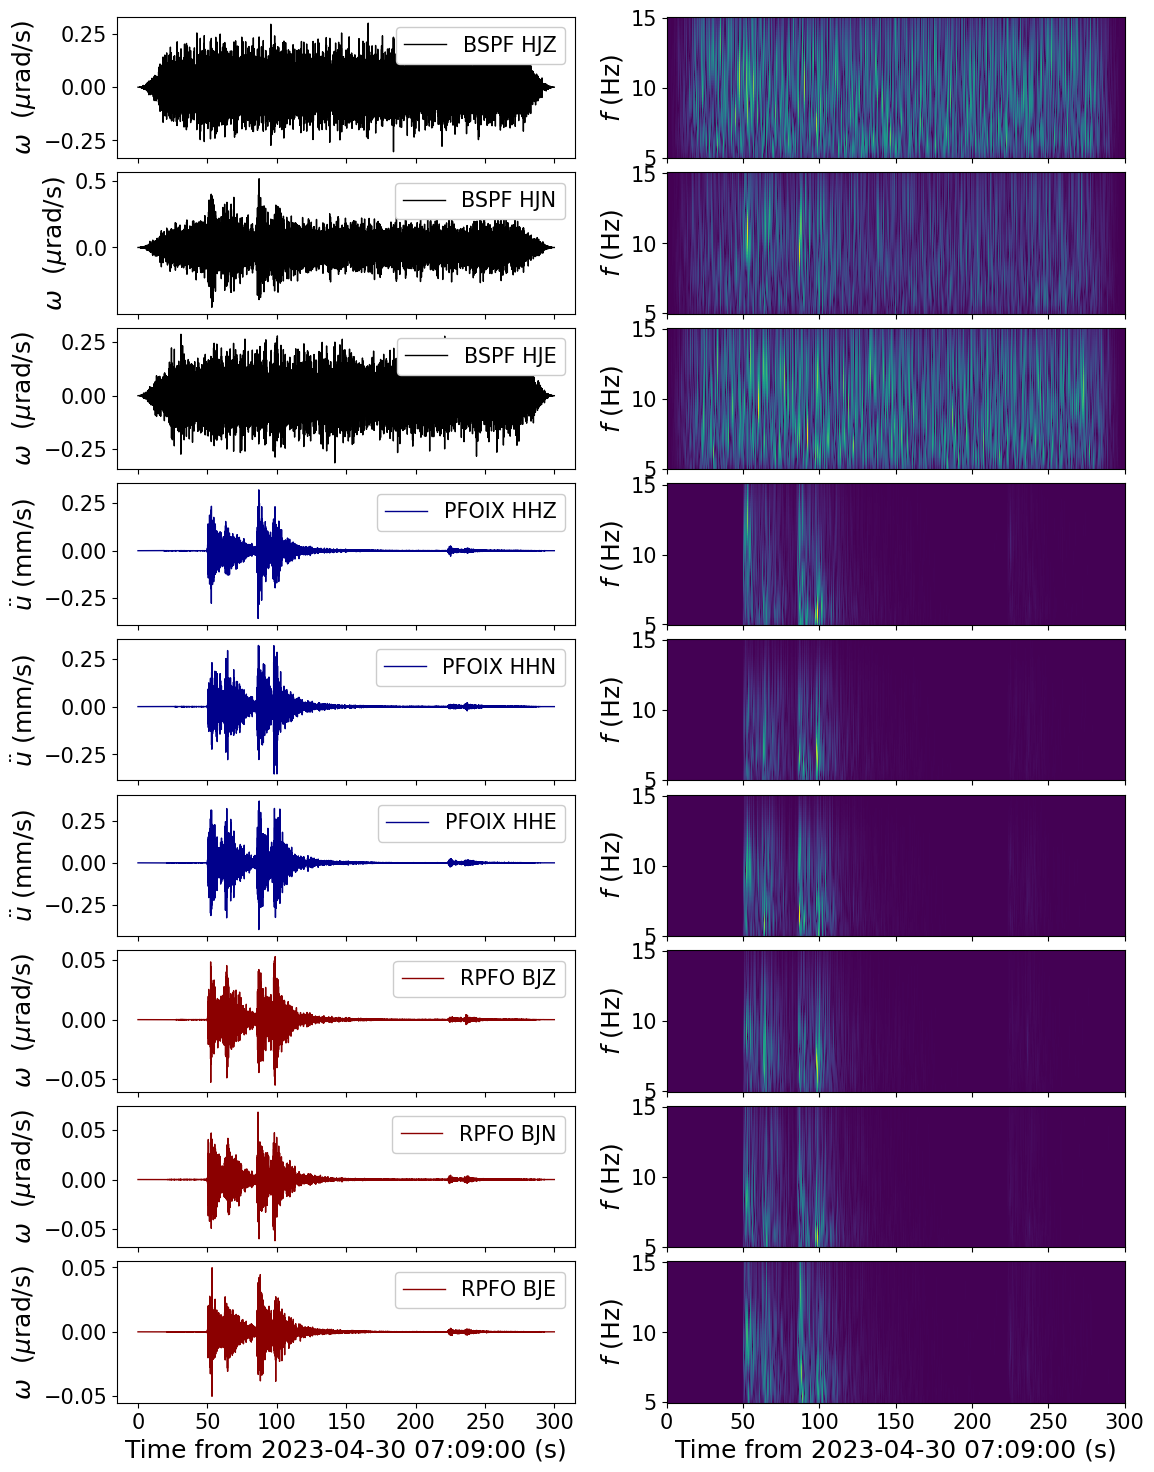

In [43]:
fig = __makeplotStream_cwt(st_all, config);

In [ ]:
# __savefig(fig, "/home/andbro/Documents/LMU_Docs/EGU2023/", "CWT_All", mode="png", dpi=600)

### Plot Coherence

In [ ]:
def __makeplotStream_coherence(st0, config):

    from scipy import fftpack
    from andbro__fft import __fft
    from matplotlib.gridspec import GridSpec
    from andbro__compute_coherence_stream import __coherence_stream
    from numpy import array
    
    import matplotlib.pyplot as plt

    st = st0.copy()
    
    NN = 5
    rot_scaling, rot_unit = 1e9, r"nrad/s"
    trans_scaling, trans_unit = 1e6, r"$\mu$m/s"
    
    rot_scaling, rot_unit = 1, r"nrad/s"
    trans_scaling, trans_unit = 1, r"$\mu$m/s"

    colors = ['crimson', 'red', 'magenta', 'darkblue', 'navy', 'indigo']

    fig = plt.figure(figsize=(15,12))
    
    gs = GridSpec(NN, 2, figure=fig)
    
    ax1 = fig.add_subplot(gs[0, :-1])
    ax2 = fig.add_subplot(gs[1, :-1])
    ax3 = fig.add_subplot(gs[2, :-1])

    ax4 = fig.add_subplot(gs[0, 1:])
    ax5 = fig.add_subplot(gs[1, 1:])
    ax6 = fig.add_subplot(gs[2, 1:])

    ax7 = fig.add_subplot(gs[3:, :])
    
    
    font = 14
    
    plt.subplots_adjust(hspace=0.1)

    ## _______________________________________________

    st.sort(keys=['channel'], reverse=True)
    
    ff, spec = __coherence_stream(st, st.select(channel="HJZ"), nseg=512, nover=50)
    
    names, ffs, specs = [], [], []
    for i, tr in enumerate(st):
        tr = tr.normalize()
        
        ffs.append(ff[i])
        specs.append(spec[i][0])
        names.append(f"{tr.stats.station}.{tr.stats.channel}")
        
        
    hz = st.select(channel="BJZ")[0]
    hn = st.select(channel="BJN")[0]
    he = st.select(channel="BJE")[0]

    jz = st.select(channel="HJZ")[0]
    jn = st.select(channel="HJN")[0]
    je = st.select(channel="HJE")[0]

    ax1.plot(hz.times(), hz.data*trans_scaling, 'k', label=f"{hz.stats.station}.{hz.stats.channel}")
    ax2.plot(hn.times(), hn.data*trans_scaling, 'k', label=f"{hn.stats.station}.{hn.stats.channel}")
    ax3.plot(he.times(), he.data*trans_scaling, 'k', label=f"{he.stats.station}.{he.stats.channel}")

    ax4.plot(jz.times(), jz.data*rot_scaling, 'k', label=f"{jz.stats.station}.{jz.stats.channel}")
    ax5.plot(jn.times(), jn.data*rot_scaling, 'k', label=f"{jn.stats.station}.{jn.stats.channel}")
    ax6.plot(je.times(), je.data*rot_scaling, 'k', label=f"{je.stats.station}.{je.stats.channel}")

    
    for ii, (ff, spec, name) in enumerate(zip(ffs, specs, names)):
        ax7.plot(ff, spec, label=name, alpha=0.6, color=colors[ii])
    
    
    for ax in [ax1, ax2, ax3, ax4 ,ax5, ax6]:
        ax.legend(loc=1, fontsize=font-2)
        ax.set_ylim(-1,1)
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        if ax not in [ax3, ax6]:
            ax.set(xticklabels=[]) 
            ax.tick_params(bottom=False)  
        
        
    if "fmin" in config.keys() and "fmax" in config.keys():
        ax7.set_xlim(config['fmin'], config['fmax'])    
    
    ax7.legend(loc=2, fontsize=font-2)

    ax3.set_xlabel("Time (s)", fontsize=font)
    ax6.set_xlabel("Time (s)", fontsize=font)

    ax7.set_xlabel("Frequency (Hz)", fontsize=font)
    ax7.set_ylabel("Spec. Amplitude ()", fontsize=font)
    
    bbox = list(ax7.get_position().bounds)
    bbox[3] = .9*bbox[3] # Reduce the height of the axis a bit.
    ax7.set_position(bbox)
    
#     axes[i,0].ticklabel_format(axis='y', style='sci', scilimits=(0,0))
#     axes[i,1].ticklabel_format(axis='y', style='sci', scilimits=(0,0))

    return fig

In [ ]:
# fig = __makeplotStream_coherence(st_adr, config);

### Plot CrossSpectralDensity

In [ ]:
def __makeplotStream_csd(st0, config):

    from scipy import fftpack
    from matplotlib.gridspec import GridSpec
    from scipy.signal import csd
    from numpy import array, log10
    
    import matplotlib.pyplot as plt

    st = st0.copy()
    
    NN = 5
    rot_scaling, rot_unit = 1e6, r"$\mu$rad/s"
    trans_scaling, trans_unit = 1e6, r"$\mu$m/s"
    
#     rot_scaling, rot_unit = 1, r"nrad/s"
#     trans_scaling, trans_unit = 1, r"$\mu$m/s"

    colors = ['crimson', 'red', 'magenta', 'darkblue', '#3776ab', 'indigo']
    colors2 = ['crimson', 'darkblue', 'red', '#3776ab', 'magenta', 'indigo']

    fig = plt.figure(figsize=(15,12))
    
    gs = GridSpec(NN, 2, figure=fig)
    
    ax1 = fig.add_subplot(gs[0, :-1])
    ax2 = fig.add_subplot(gs[1, :-1])
    ax3 = fig.add_subplot(gs[2, :-1])

    ax4 = fig.add_subplot(gs[0, 1:])
    ax5 = fig.add_subplot(gs[1, 1:])
    ax6 = fig.add_subplot(gs[2, 1:])

    ax7 = fig.add_subplot(gs[3:, :])
    
    
    font = 18
    
    plt.subplots_adjust(hspace=0.1)

    ## _______________________________________________

#     st.normalize()
    
    st.sort(keys=['channel'], reverse=True)
        
    names, ffs, csds, ffs2, csds2 = [], [], [], [], []
    for comp in ["Z", "N", "E"]:
        
        tmp = st.select(channel=f"*{comp}")

        print(tmp)
        
        ff, Pxy = csd(  
                        tmp[0].data, 
                        tmp[1].data, 
                        fs=tmp[0].stats.sampling_rate, 
                        nperseg=int(10*tmp[0].stats.sampling_rate),
                        window='hann', 
                        noverlap=75, 
                        nfft=None, 
                        detrend='constant', 
                        return_onesided=True, 
                        scaling='spectrum', 
                        axis=-1, 
                        average='mean'
                    )
        names.append(f"{tmp[0].stats.channel}_inner")
        ffs.append(ff)
        csds.append(Pxy)
        
        ff2, Pxy2 = csd(  
                        tmp[0].data, 
                        tmp[2].data, 
                        fs=tmp[0].stats.sampling_rate, 
                        nperseg=int(10*tmp[0].stats.sampling_rate),
                        window='hann', 
                        noverlap=75, 
                        nfft=None, 
                        detrend='constant', 
                        return_onesided=True, 
                        scaling='spectrum', 
                        axis=-1, 
                        average='mean'
                    )
        
        names.append(f"{tmp[0].stats.channel}_all")
        
        ffs.append(ff2)
        csds.append(Pxy2)

        
    hz = st.select(channel="B*Z")[0]
    hn = st.select(channel="B*N")[0]
    he = st.select(channel="B*E")[0]

    jz = st.select(channel="HJZ")[0]
    jn = st.select(channel="HJN")[0]
    je = st.select(channel="HJE")[0]

    ax1.plot(hz.times(), hz.data*rot_scaling, colors[3], label=f"{hz.stats.station}.{hz.stats.channel}")
    ax2.plot(hn.times(), hn.data*rot_scaling, colors[4], label=f"{hn.stats.station}.{hn.stats.channel}")
    ax3.plot(he.times(), he.data*rot_scaling, colors[5], label=f"{he.stats.station}.{he.stats.channel}")

    ax4.plot(jz.times(), jz.data*rot_scaling, colors[3], label=f"{jz.stats.station}.{jz.stats.channel}")
    ax5.plot(jn.times(), jn.data*rot_scaling, colors[4], label=f"{jn.stats.station}.{jn.stats.channel}")
    ax6.plot(je.times(), je.data*rot_scaling, colors[5], label=f"{je.stats.station}.{je.stats.channel}")

    
    for ii, (ff, cc, name) in enumerate(zip(ffs, csds, names)):
        ax7.plot(ff, 20*log10(abs(cc)/1e-9), label=name[2:], alpha=0.6, color=colors2[ii])
#         ax7.plot(ff, abs(cc)*1e9, label=name[-1], alpha=0.6, color=colors[ii+3])
        

    ax7.set_xscale("log")
#     ax7.set_yscale("log")
    
    for ax in [ax1, ax2, ax3, ax4 ,ax5, ax6]:
        ax.legend(loc=1, fontsize=font-2)
        ax.set_ylabel(f"$\omega$ ({rot_unit})", fontsize=font)
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        if ax not in [ax3, ax6]:
            ax.set(xticklabels=[]) 
            ax.tick_params(bottom=False)  
        
    ax7.grid(which="both", ls=":", alpha=0.7, color="grey")
    ax7.legend(fontsize=font-2, ncol=3)
    ax7.set_xlim(0.1, 20)
    
    ax3.set_xlabel("Time (s)", fontsize=font)
    ax6.set_xlabel("Time (s)", fontsize=font)

    ax7.set_xlabel("Frequency (Hz)", fontsize=font)
    ax7.set_ylabel(f"Cross Spectral Density \n (dB rel. to 1 nrad$^2$/s$^2$/Hz)", fontsize=font)
    
    bbox = list(ax7.get_position().bounds)
    bbox[3] = .85*bbox[3] # Reduce the height of the axis a bit.
    ax7.set_position(bbox)
    
    for ax in [ax1, ax2, ax3, ax4 ,ax5, ax6, ax7]:
        ax.tick_params(axis="y", labelsize=15)
        ax.tick_params(axis="x", labelsize=15)
            
#     axes[i,0].ticklabel_format(axis='y', style='sci', scilimits=(0,0))
#     axes[i,1].ticklabel_format(axis='y', style='sci', scilimits=(0,0))

    return fig

In [ ]:
# fig = __makeplotStream_csd(st_adr, config)

In [ ]:
def __makeplotStream_csd2(st0, config):

    from scipy import fftpack
    from matplotlib.gridspec import GridSpec
    from scipy.signal import csd
    from numpy import array, log10
    
    import matplotlib.pyplot as plt

    st = st0.copy()
    
    NN = 5
    rot_scaling, rot_unit = 1e6, r"$\mu$rad/s"
    trans_scaling, trans_unit = 1e6, r"$\mu$m/s"
    
#     rot_scaling, rot_unit = 1, r"nrad/s"
#     trans_scaling, trans_unit = 1, r"$\mu$m/s"

    colors = ['crimson', 'red', 'magenta', 'darkblue', '#3776ab', 'indigo']
    colors2 = ['crimson', 'darkblue', 'red', '#3776ab', 'magenta', 'indigo']

    fig = plt.figure(figsize=(15,14))
    
    gs = GridSpec(NN, 2, figure=fig)
    
    ax1 = fig.add_subplot(gs[0, :-1])
    ax2 = fig.add_subplot(gs[1, :-1])
    ax3 = fig.add_subplot(gs[2, :-1])

    ax4 = fig.add_subplot(gs[0, 1:])
    ax5 = fig.add_subplot(gs[1, 1:])
    ax6 = fig.add_subplot(gs[2, 1:])

    ax7 = fig.add_subplot(gs[3:, :])
    
    
    font = 18
    
    plt.subplots_adjust(hspace=0.1)

    ## _______________________________________________

#     st.normalize()
    
    st.sort(keys=['channel'], reverse=True)
        
    bspf_all_data, bspf_inner_data, adr_all_data, adr_inner_data = [],[],[],[] 
    names, ffs, csds, ffs2, csds2 = [], [], [], [], []
    for comp in ["Z", "N", "E"]:
                
        tmp = st.select(channel=f"*{comp}")
        print(tmp)

        bspf_inner = tmp[0].copy()
        bspf_inner.taper(0.1)
        bspf_inner.filter("bandpass", freqmin=1, freqmax=10, corners=4, zerophase=True)
        
        adr_inner = tmp[1].copy()
        adr_inner.taper(0.1)
        adr_inner.filter("bandpass", freqmin=1, freqmax=10, corners=4, zerophase=True)
        
        nseg = int(20*tmp[0].stats.sampling_rate)
        
        ff, Pxy = csd(  
                        bspf_inner.data, 
                        adr_inner.data, 
                        fs=bspf_inner.stats.sampling_rate, 
                        nperseg=nseg,
                        window='hann', 
                        noverlap=int(0.75*nseg), 
                        nfft=None, 
                        detrend='constant', 
                        return_onesided=True, 
                        scaling='density', 
                        axis=-1, 
                        average='mean'
                    )
        names.append(f"{tmp[0].stats.channel}"+r"$_{inner}$")
        ffs.append(ff)
        csds.append(Pxy)

        adr_inner_data.append(adr_inner.data)
        bspf_inner_data.append(bspf_inner.data)
        
        ## _____________________________________
        
        bspf_all = tmp[0].copy()
        bspf_all.taper(0.1)
        bspf_all.filter("bandpass", freqmin=0.15, freqmax=1.2, corners=4, zerophase=True)
        
        adr_all = tmp[2].copy()
        adr_all.taper(0.1)
        adr_all.filter("bandpass", freqmin=0.15, freqmax=1.2, corners=4, zerophase=True)
                
        nseg = int(20*tmp[0].stats.sampling_rate)
        
        ff2, Pxy2 = csd(  
                        bspf_all.data, 
                        adr_all.data, 
                        fs=bspf_all.stats.sampling_rate, 
                        nperseg=nseg,
                        window='hann', 
                        noverlap=int(0.75*nseg), 
                        nfft=None, 
                        detrend='constant', 
                        return_onesided=True, 
                        scaling='density', 
                        axis=-1, 
                        average='mean'
                    )
        
        names.append(f"{tmp[0].stats.channel}"+r"$_{outer}$")
        
        ffs.append(ff2)
        csds.append(Pxy2)
        
        adr_all_data.append(adr_all.data)
        bspf_all_data.append(bspf_all.data)
        
    hz = st.select(channel="B*Z")[0]
    hn = st.select(channel="B*N")[0]
    he = st.select(channel="B*E")[0]

    jz = st.select(channel="HJZ")[0]
    jn = st.select(channel="HJN")[0]
    je = st.select(channel="HJE")[0]

    ax1.plot(hz.times(), bspf_all_data[0]*rot_scaling, 'black', label=f"BSPF.Z")
    ax2.plot(hn.times(), bspf_all_data[1]*rot_scaling, 'black', label=f"BSPF.N")
    ax3.plot(he.times(), bspf_all_data[2]*rot_scaling, 'black', label=f"BSPF.E")
    ax1.plot(hz.times(), adr_all_data[0]*rot_scaling, 'darkred', label=r"ADR$_{outer}$.Z")
    ax2.plot(hn.times(), adr_all_data[1]*rot_scaling, 'darkred', label=r"ADR$_{outer}$.N")
    ax3.plot(he.times(), adr_all_data[2]*rot_scaling, 'darkred', label=r"ADR$_{outer}$.E")

    ax4.plot(jz.times(), bspf_inner_data[0]*rot_scaling, 'black', label=f"BSPF.Z")
    ax5.plot(jn.times(), bspf_inner_data[1]*rot_scaling, 'black', label=f"BSPF.N")
    ax6.plot(je.times(), bspf_inner_data[2]*rot_scaling, 'black', label=f"BSPF.E")
    ax4.plot(jz.times(), adr_inner_data[0]*rot_scaling, 'darkred', label=r"ADR$_{inner}$.Z")
    ax5.plot(jn.times(), adr_inner_data[1]*rot_scaling, 'darkred', label=r"ADR$_{inner}$.N")
    ax6.plot(je.times(), adr_inner_data[2]*rot_scaling, 'darkred', label=r"ADR$_{inner}$.E")

    
    for ii, (ff, cc, name) in enumerate(zip(ffs, csds, names)):
        ax7.plot(ff, 20*log10(abs(cc)/1e-9), label=name[2:], alpha=0.6, color=colors2[ii])
#         ax7.plot(ff, abs(cc)*1e9, label=name[-1], alpha=0.6, color=colors[ii+3])
        

    ax7.set_xscale("log")
#     ax7.set_yscale("log")
    
    for ax in [ax1, ax2, ax3, ax4 ,ax5, ax6]:
        ax.legend(loc=1, fontsize=font-3, bbox_to_anchor=(0.95, 1.10))
        ax.set_ylabel(f"$\omega$ ({rot_unit})", fontsize=font)
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        if ax not in [ax3, ax6]:
            ax.set(xticklabels=[]) 
            ax.tick_params(bottom=False)  
        
    ax7.grid(which="both", ls=":", alpha=0.7, color="grey")
    ax7.legend(fontsize=font-2, ncol=3)
    ax7.set_xlim(0.1, 20)
    
    ax3.set_xlabel("Time (s)", fontsize=font)
    ax6.set_xlabel("Time (s)", fontsize=font)

    ax7.set_xlabel("Frequency (Hz)", fontsize=font)
    ax7.set_ylabel(f"Cross Spectral Density \n (dB rel. to 1 nrad$^2$/s$^2$/Hz)", fontsize=font)
    
    bbox = list(ax7.get_position().bounds)
    bbox[3] = .85*bbox[3] # Reduce the height of the axis a bit.
    ax7.set_position(bbox)
    
    for ax in [ax1, ax2, ax3, ax4 ,ax5, ax6, ax7]:
        ax.tick_params(axis="y", labelsize=15)
        ax.tick_params(axis="x", labelsize=15)
            
#     axes[i,0].ticklabel_format(axis='y', style='sci', scilimits=(0,0))
#     axes[i,1].ticklabel_format(axis='y', style='sci', scilimits=(0,0))

    return fig

In [ ]:
fig = __makeplotStream_csd2(st_adr, config)

In [ ]:
# __savefig(fig, "/home/andbro/Documents/LMU_Docs/EGU2023/", "ADR_ALL_CSP", mode="png", dpi=600)

## Plot Wavelet Coherence Transform (WCT) and  Cross Wavelet Transform (XWT)

In [ ]:
from pycwt import xwt, wct, significance

In [ ]:
def __makeplotStream_csd(st0, config):

    from scipy import fftpack
    from matplotlib.gridspec import GridSpec
    from scipy.signal import csd
    from numpy import array
    from pycwt import xwt, wct, significance
    
    import matplotlib.pyplot as plt

    st = st0.copy()
    
    NN = 5
    rot_scaling, rot_unit = 1e9, r"nrad/s"
    trans_scaling, trans_unit = 1e6, r"$\mu$m/s"
    
    rot_scaling, rot_unit = 1, r"nrad/s"
    trans_scaling, trans_unit = 1, r"$\mu$m/s"

    colors = ['crimson', 'red', 'magenta', 'darkblue', '#3776ab', 'indigo']

    fig = plt.figure(figsize=(15,12))
    
    gs = GridSpec(NN, 2, figure=fig)
    
    ax1 = fig.add_subplot(gs[0, :-1])
    ax2 = fig.add_subplot(gs[1, :-1])
    ax3 = fig.add_subplot(gs[2, :-1])

    ax4 = fig.add_subplot(gs[0, 1:])
    ax5 = fig.add_subplot(gs[1, 1:])
    ax6 = fig.add_subplot(gs[2, 1:])

    ax7 = fig.add_subplot(gs[3:, :])
    
    
    font = 14
    
    plt.subplots_adjust(hspace=0.1)

    ## _______________________________________________

#     st.normalize()
    
    st.sort(keys=['channel'], reverse=True)
        
    names, ffs_cwt, cwts, ffs_xwt, xwts = [], [], [], [], []
    for comp in ["Z", "N", "E"]:
        
        tmp = st.select(channel=f"*{comp}")

        wave_cwt, scale, coi, ff_cwt, fftfreqs  = wct( 
                                                        tmp[0].data, 
                                                        tmp[1].data, 
                                                        dt=tmp[0].stats.delta, 
                                                        dj=0.1,
                                                        s0=-1,
                                                        J=-1,
                                                        significance_level=0.95,
                                                        wavelet='morlet',
                                                        normalize=True
                                                    )
        
        wave_xwt,b,ff_xwt,d = xwt(
                                    tmp[0].data, 
                                    tmp[1].data, 
                                    dt=tmp[0].stats.delta, 
                                    dj=0.1, 
                                    s0=-1, 
                                    J=-1, 
                                    significance_level=0.95, 
                                    wavelet='morlet', 
                                    normalize=True
                                   )
        
        names.append(f"{tmp[0].stats.channel}")
        ffs_cwt.append(ff_cwt)
        cwts.append(abs(wave_cwt).mean(axis=1))
        ffs_xwt.append(ff_xwt)
        xwts.append(abs(wave_xwt).mean(axis=1))

        
    hz = st.select(channel="B*Z")[0]
    hn = st.select(channel="B*N")[0]
    he = st.select(channel="B*E")[0]

    jz = st.select(channel="HJZ")[0]
    jn = st.select(channel="HJN")[0]
    je = st.select(channel="HJE")[0]

    ax1.plot(hz.times(), hz.data*trans_scaling, colors[3], label=f"{hz.stats.station}.{hz.stats.channel}")
    ax2.plot(hn.times(), hn.data*trans_scaling, colors[4], label=f"{hn.stats.station}.{hn.stats.channel}")
    ax3.plot(he.times(), he.data*trans_scaling, colors[5], label=f"{he.stats.station}.{he.stats.channel}")

    ax4.plot(jz.times(), jz.data*rot_scaling, colors[3], label=f"{jz.stats.station}.{jz.stats.channel}")
    ax5.plot(jn.times(), jn.data*rot_scaling, colors[4], label=f"{jn.stats.station}.{jn.stats.channel}")
    ax6.plot(je.times(), je.data*rot_scaling, colors[5], label=f"{je.stats.station}.{je.stats.channel}")

    ax8 = ax7.twinx()

    for ii, (ff_cwt, cwt, ff_xwt, xwt, name) in enumerate(zip(ffs_cwt, cwts, ffs_xwt, xwts, names)):
        ax7.plot(ff_cwt, cwt, label=name[-1], alpha=0.8, color=colors[ii+3])
        
        ax8.plot(ff_xwt, xwt, label=name[-1], alpha=0.8, color=colors[ii])
        

    ax7.set_xscale("log")
    ax7.set_yscale("log")
    ax8.set_yscale("log")
    
    for ax in [ax1, ax2, ax3, ax4 ,ax5, ax6]:
        ax.legend(loc=1, fontsize=font-2)
        ax.set_ylim(-1,1)
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        if ax not in [ax3, ax6]:
            ax.set(xticklabels=[]) 
            ax.tick_params(bottom=False)  
        

    ax7.legend(loc=4, fontsize=font-2)
    ax8.legend(loc=1, fontsize=font-2)

    ax3.set_xlabel("Time (s)", fontsize=font)
    ax6.set_xlabel("Time (s)", fontsize=font)

    ax7.set_xlabel("Frequency (Hz)", fontsize=font)
    ax7.set_ylabel("Wavlet Coherence Transform", fontsize=font)
    ax8.set_ylabel("Cross Wavlet Transform", fontsize=font, color="darkred")
    
    bbox = list(ax7.get_position().bounds)
    bbox[3] = .9*bbox[3] # Reduce the height of the axis a bit.
    ax7.set_position(bbox)
    
#     axes[i,0].ticklabel_format(axis='y', style='sci', scilimits=(0,0))
#     axes[i,1].ticklabel_format(axis='y', style='sci', scilimits=(0,0))

    return fig

In [ ]:
st_adr2 = st_adr.copy()
st_adr2.normalize()

fig = __makeplotStream_csd(st_adr2, config)

In [ ]:
wave_cwt, scale, coi, ff_wct, fftfreqs  = wct( 
                                        py_z[0].data, 
                                        ad_z[0].data, 
                                        dt=ad_z[0].stats.delta, 
                                        dj=0.05,
                                        s0=-1,
                                        J=-1,
                                        significance_level=0.95,
                                        wavelet='morlet',
                                        normalize=True
                                    )

In [ ]:
wave.shape, scale.shape, coi.shape, fft.shape, fftfreqs.shape

In [ ]:
t = ad_z[0].times()
dt = ad_z[0].stats.delta

plt.pcolormesh(t, ff_wct, wave_cwt)
# plt.contour(t, freqs, scale, colors='k', linewidths=2, extent=[t.min(), t.max(), 0, freqs.max()])
# plt.yscale("log")

In [ ]:
global_power = abs(wave_cwt).mean(axis=1)

# global_power *= np.std(ad_z[0].data)

plt.plot(freqs,  global_power)

In [ ]:
wave_xwt,b,ff,d = xwt(
                    py_z[0].data, 
                    ad_z[0].data, 
                    dt=ad_z[0].stats.delta, 
                    dj=0.05, 
                    s0=-1, J=-1, 
                    significance_level=0.95, 
                    wavelet=u'morlet', 
                    normalize=True
                   )

In [ ]:
plt.pcolormesh(t, ff, abs(wave_xwt))

In [ ]:
global_xwt = abs(wave_xwt).mean(axis=1)

plt.plot(ff, global_xwt)

In [ ]:
a.shape,b.shape,c.shape,d.shape

### Plot CrossCorrelation

In [ ]:
from functions.compute_cc_for_fbands import __compute_cc_for_fbands

In [ ]:
st_adr_cc = obs.Stream()

st_adr_cc += py_bspf.copy()
st_adr_cc += adr_inner.copy()
# st_adr_cc += py_bspf.copy()

st_adr_cc.filter("bandpass", freqmin=0.2, freqmax=5.0, corners=8, zerophase=True)
st_adr_cc.trim(adr_inner[0].stats.starttime, adr_inner[0].stats.endtime)

In [ ]:
def __makeplotStream_cc(st0, config):

    from scipy import fftpack
    from andbro__fft import __fft
    from matplotlib.gridspec import GridSpec
    from numpy import array
    
    import matplotlib.pyplot as plt

    st = st0.copy()
    
    NN = 5
    rot_scaling, rot_unit = 1e9, r"nrad/s"
    trans_scaling, trans_unit = 1e6, r"$\mu$m/s"
    
#     rot_scaling, rot_unit = 1, r"nrad/s"
#     trans_scaling, trans_unit = 1, r"$\mu$m/s"

    colors = ['crimson', 'red', 'magenta', 'darkblue', '#3776ab', 'indigo']

    fig = plt.figure(figsize=(15,12))
    
    gs = GridSpec(NN, 2, figure=fig)
    
    ax1 = fig.add_subplot(gs[0, :-1])
    ax2 = fig.add_subplot(gs[1, :-1])
    ax3 = fig.add_subplot(gs[2, :-1])

    ax4 = fig.add_subplot(gs[0, 1:])
    ax5 = fig.add_subplot(gs[1, 1:])
    ax6 = fig.add_subplot(gs[2, 1:])

    ax7 = fig.add_subplot(gs[3:, :])
    
    
    font = 14
    
    plt.subplots_adjust(hspace=0.1)

    ## _______________________________________________

#     st.normalize()
    
    st.sort(keys=['channel'], reverse=True)
        
    names, ffs, ccs, ccs_max = [], [], [], []
    for comp in ["Z", "N", "E"]:
        
        tmp = st.select(channel=f"*{comp}")

        f_centers, ccorrs, cc_maxs = __compute_cc_for_fbands(tmp[0], tmp[1], 
                                                    fmin=config['fmin'], 
                                                    fmax=config['fmax'], 
                                                    fband_type='octave'
                                                   )
        
        names.append(f"{tmp[0].stats.channel}")
        ffs.append(f_centers)
        ccs.append(ccorrs)
        ccs_max.append(cc_maxs)
        
    hz = st.select(station="BSPF")[0]
    hn = st.select(station="BSPF")[0]
    he = st.select(station="BSPF")[0]

#     jz = st.select(station="RPFO")[0]
#     jn = st.select(station="RPFO")[0]
#     je = st.select(station="RPFO")[0]
    jz = st.select(station="BSPF")[0]
    jn = st.select(station="BSPF")[0]
    je = st.select(station="BSPF")[0]
    
    ax1.plot(hz.times(), hz.data*trans_scaling, colors[3], label=f"{hz.stats.station}.{hz.stats.channel}")
    ax2.plot(hn.times(), hn.data*trans_scaling, colors[4], label=f"{hn.stats.station}.{hn.stats.channel}")
    ax3.plot(he.times(), he.data*trans_scaling, colors[5], label=f"{he.stats.station}.{he.stats.channel}")

    ax4.plot(jz.times(), jz.data*rot_scaling, colors[3], label=f"{jz.stats.station}.{jz.stats.channel}")
    ax5.plot(jn.times(), jn.data*rot_scaling, colors[4], label=f"{jn.stats.station}.{jn.stats.channel}")
    ax6.plot(je.times(), je.data*rot_scaling, colors[5], label=f"{je.stats.station}.{je.stats.channel}")

    for ii, (ff, cc, cc_max, name) in enumerate(zip(ffs, ccs, ccs_max, names)):
        
        ax7.plot(ff, cc, label=name[-1], alpha=0.6, color=colors[ii+3])
        ax7.scatter(ff, cc, alpha=0.6, color=colors[ii+3])
        
        ax7.plot(ff, cc_max, marker='o', alpha=0.6, color=colors[ii+3], ls="--" )
        ax7.scatter(ff, cc_max, marker='o', alpha=0.6, color=colors[ii+3])
        
    ax7.set_xscale("log")
    ax7.set_ylim(-1.1, 1.1)
    
    for ax in [ax1, ax2, ax3, ax4 ,ax5, ax6]:
        ax.legend(loc=1, fontsize=font-2)
#         ax.set_ylim(-1,1)
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        if ax not in [ax3, ax6]:
            ax.set(xticklabels=[]) 
            ax.tick_params(bottom=False)  
        
        
#     if "fmin" in config.keys() and "fmax" in config.keys():
#         ax7.set_xlim(config['fmin'], config['fmax'])    
    
    ax7.legend(loc=4, fontsize=font-2)

    ax3.set_xlabel("Time (s)", fontsize=font)
    ax6.set_xlabel("Time (s)", fontsize=font)

    ax7.set_xlabel("Frequency (Hz)", fontsize=font)
    ax7.set_ylabel("Spec. Amplitude ()", fontsize=font)
    ax7.grid(ls=":", which="both", alpha=0.7)
    
    ## Reduce the height of the axis a bit.
    bbox = list(ax7.get_position().bounds)
    bbox[3] = .9*bbox[3] 
    ax7.set_position(bbox)
    
#     axes[i,0].ticklabel_format(axis='y', style='sci', scilimits=(0,0))
#     axes[i,1].ticklabel_format(axis='y', style='sci', scilimits=(0,0))

    return fig

In [ ]:
fig = __makeplotStream_cc(st_adr_cc, config);

## Backazimuth

In [ ]:
config['station_longitude'] = config['BSPF_lon']
config['station_latitude']  = config['BSPF_lat']

config['win_length_sec'] = 1  ## window length for correlation
config['step'] = 1
config['overlap'] = 50

In [ ]:
from functions.compute_backazimuth import __compute_backazimuth

out = __compute_backazimuth(ii_pfo, py_bspf, config, plot=True)